<a href="https://colab.research.google.com/github/dindatriw/Exploratory-Data-Analysis/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sumber data : https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo?select=Medals.xlsx

# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) merupakan salah satu bagian dari proses data science. EDA ini menjadi sangat penting sebelum melakukan proses selanjutnya yaitu *feature engineering* dan *modeling* karena dalam tahap ini juga merupakan proses pemahaman data.

# Data

Sumber data : https://www.kaggle.com/namanmanchanda/red-wine-eda-and-classification/data

# Install Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Membaca Dataset

In [2]:
data = pd.read_csv('/content/winequality-red (1).csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Statistik Deskriptif

## Cek Tipe Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Semua bertipe data numerik.

## Cek Missing Values

In [ ]:
order_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

dari 12 kolom tersebut tidak ada yang missing values.

## Cek Duplikat Data

In [ ]:
print(data.shape)
data.duplicated().sum()

(1359, 12)


1

In [ ]:
#menghapus data duplikat 
data.drop_duplicates(inplace=True)
print(data.duplicated().sum()) 
print(data.shape) # re-check

0
(1358, 12)


## Deskripsi

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.00000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,8.162094,0.529392,0.272172,2.522165,0.088119,15.897644,46.84352,0.996704,3.310074,0.658645,10.431824,5.623711
std,1.495892,0.183072,0.195519,1.352046,0.049395,10.449894,33.41499,0.001861,0.154732,0.170715,1.082312,0.823708
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.00000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.00000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.00000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.000000,0.640000,0.430000,2.600000,0.090750,21.000000,63.00000,0.997815,3.400000,0.730000,11.100000,6.000000
max,12.300000,1.580000,1.000000,15.500000,0.611000,72.000000,289.00000,1.003690,4.010000,2.000000,14.900000,8.000000


# Univariate Analysis

Merupakan analisis deskriptif dengan satu variabel.

## Histogram

untuk melihat penyebaran data

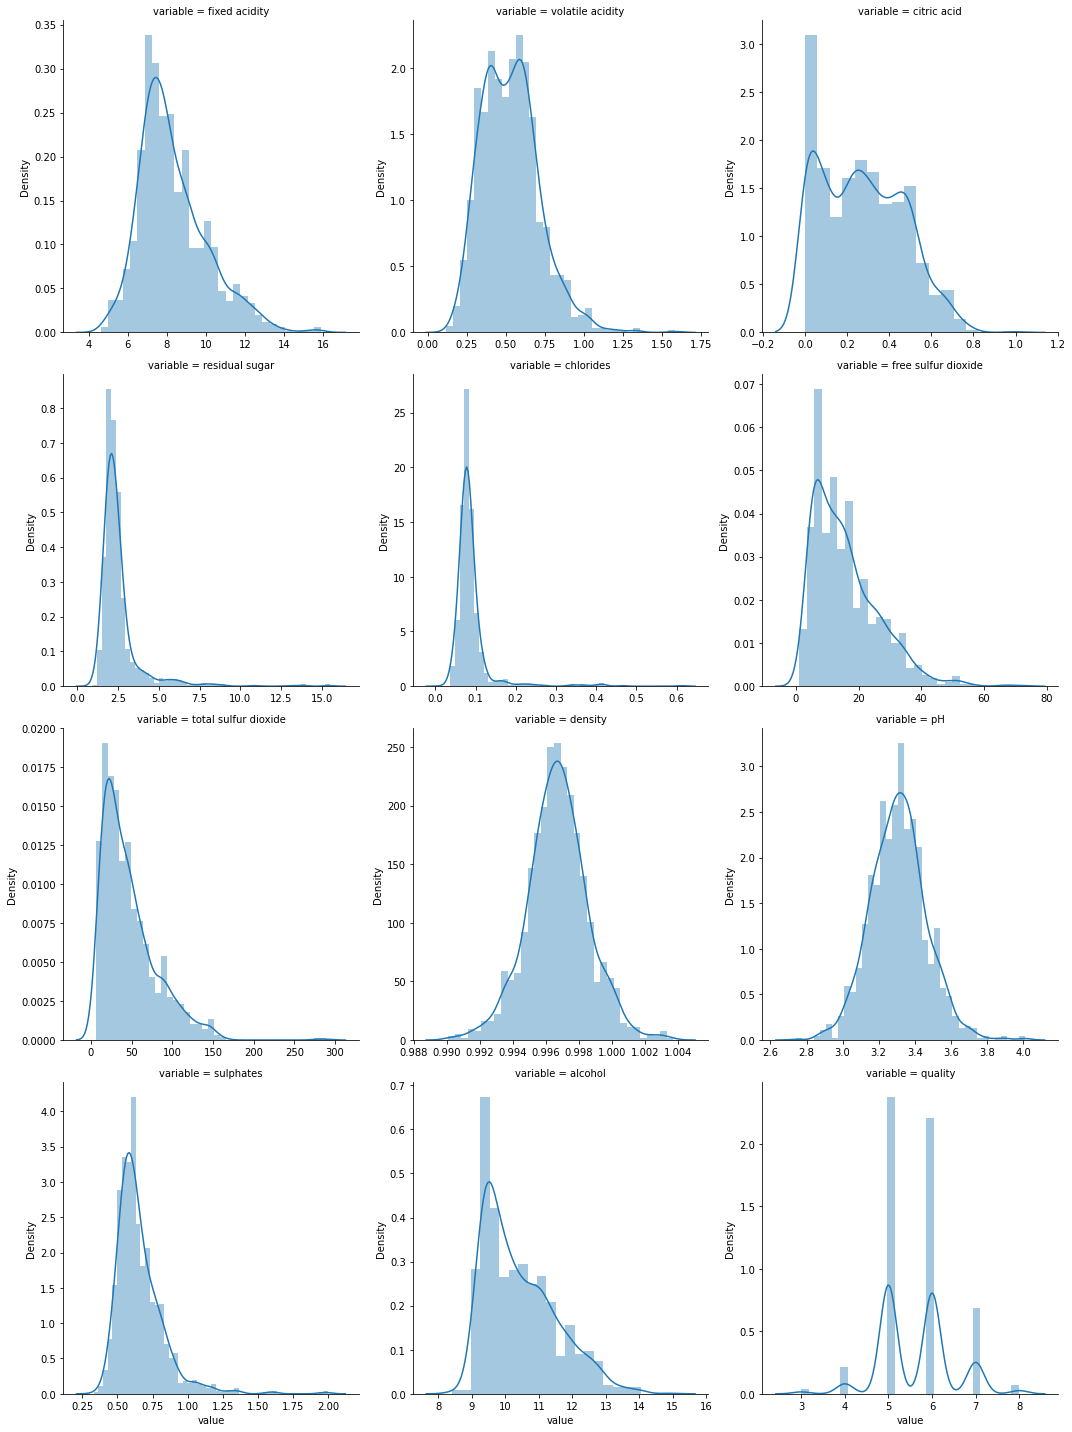

In [ ]:
#histogram
import warnings
warnings.filterwarnings('ignore')
f = pd.melt(data, value_vars=data)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.distplot, "value");

Untuk melihat ketidaksimetrisan dalam distribusi data, dapat menggunakan *Skewness* dimana dapat bernilai positif, negatif, dan nol.

*Skewness* yang bernilai positif berarti distribusi melenceng ke sebelah kanan. Maka, sebagian besar distribusi berada di nilai rendah. Sedangkan, *skewness* yang bernilai negatif berarti distribusi melenceng ke sebelah kiri, menunjukkan bahwa sebagian besar nilai berada di sisi kanan kurva. 

Berdasar hasil di atas, fitur yang memiliki *skewness* positif di antaranya fixed acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, dan alcohol.

Sedangkan fitur yang memiliki *skewness* negatif di antaranya density, dan pH.

Dan nilai yang dianggap memiliki distribusi nilai yang lebih besar dibanding lainnya yaitu volatile acidity, citric acid dan quality.

## Outliers

untuk melihat nilai yang berbeda jauh /data pencilan antar fitur

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


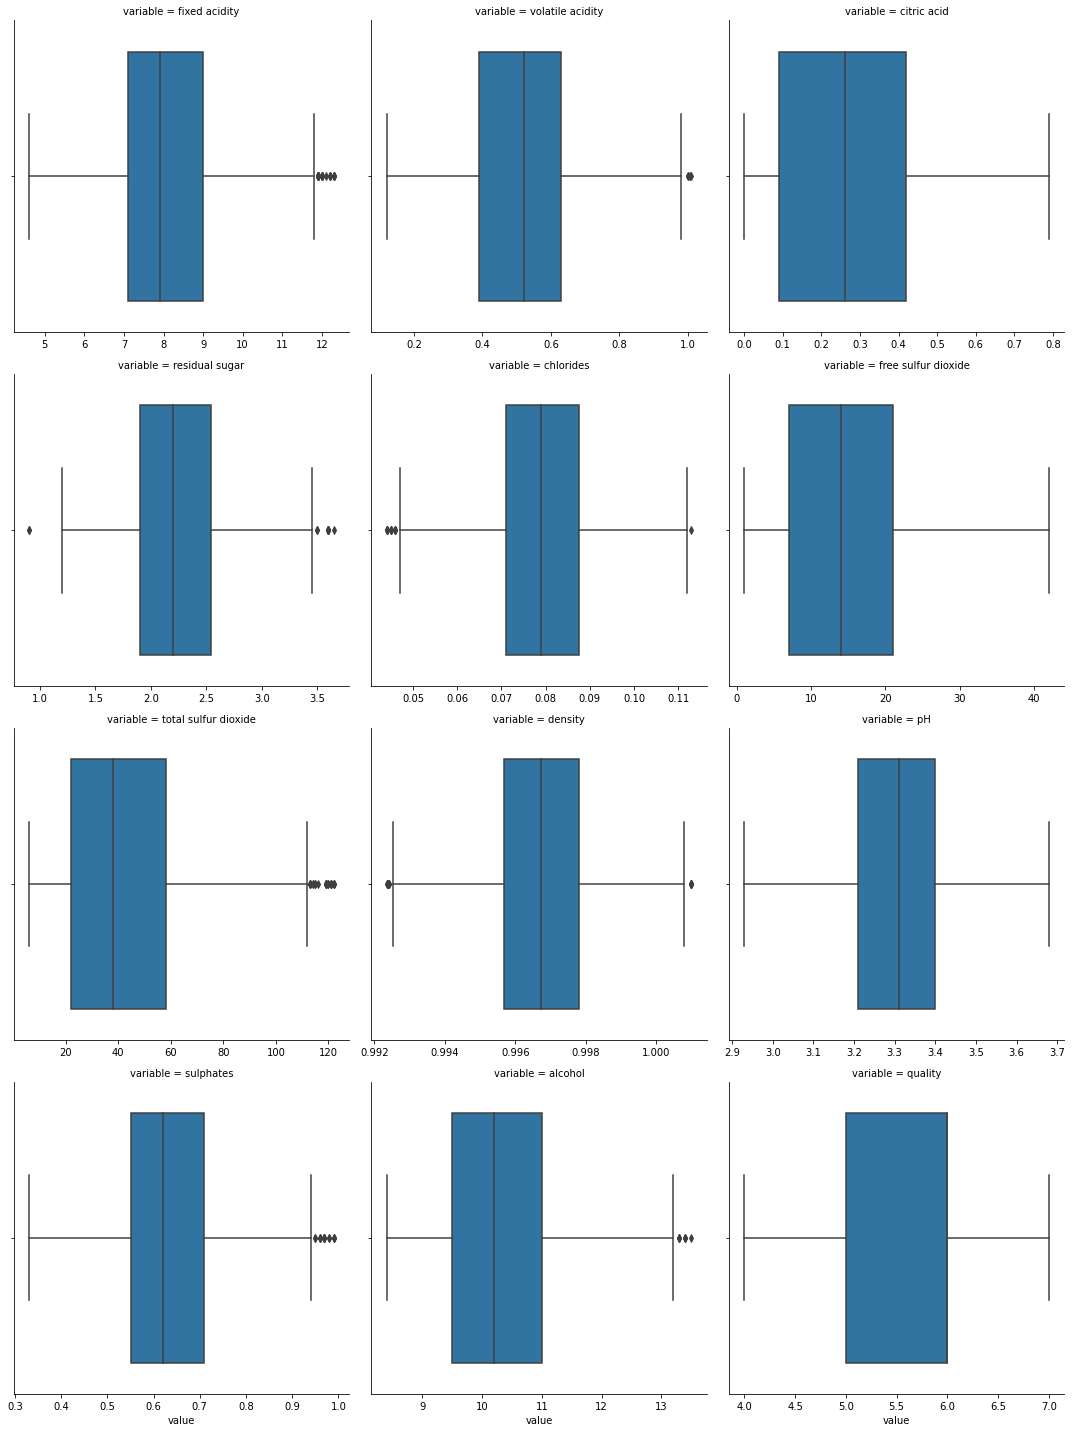

In [52]:
# outliers
f = pd.melt(data, value_vars=data)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.boxplot, "value");

Terlihat semua nilai mengandung outliers. Dan hampir semua fitur memiliki nilai outlier di atas Q3. Outliers terjadi ketika terdapat nilai yang berbeda jauh dengan mean maupun median. Ini artinya memang data memiliki distribusi yang beragam. 

1.   Item daftar
2.   Item daftar



In [17]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
   
outliers(data['fixed acidity'])

,sub,values
0,IQR,2.100000
1,Upper Bound,12.350000
2,Lower Bound,3.950000
3,Sum outliers,49.000000
4,percentage outliers,3.064415


In [21]:
outliers(data['volatile acidity'])

,sub,values
0,IQR,0.250000
1,Upper Bound,1.015000
2,Lower Bound,0.015000
3,Sum outliers,19.000000
4,percentage outliers,1.188243


In [22]:
outliers(data['citric acid'])

,sub,values
0,IQR,0.330000
1,Upper Bound,0.915000
2,Lower Bound,-0.405000
3,Sum outliers,1.000000
4,percentage outliers,0.062539


In [27]:
outliers(data['residual sugar'])

,sub,values
0,IQR,0.700000
1,Upper Bound,3.650000
2,Lower Bound,0.850000
3,Sum outliers,155.000000
4,percentage outliers,9.693558


In [28]:
outliers(data['chlorides'])

,sub,values
0,IQR,0.017467
1,Upper Bound,0.113666
2,Lower Bound,0.043800
3,Sum outliers,41.000000
4,percentage outliers,2.564103


In [29]:
outliers(data['free sulfur dioxide'])

,sub,values
0,IQR,14.000000
1,Upper Bound,42.000000
2,Lower Bound,-14.000000
3,Sum outliers,30.000000
4,percentage outliers,1.876173


In [30]:
outliers(data['total sulfur dioxide'])

,sub,values
0,IQR,40.00000
1,Upper Bound,122.00000
2,Lower Bound,-38.00000
3,Sum outliers,55.00000
4,percentage outliers,3.43965


In [31]:
outliers(data['density'])

,sub,values
0,IQR,0.002235
1,Upper Bound,1.001187
2,Lower Bound,0.992248
3,Sum outliers,45.000000
4,percentage outliers,2.814259


In [32]:
outliers(data['pH'])

,sub,values
0,IQR,0.190000
1,Upper Bound,3.685000
2,Lower Bound,2.925000
3,Sum outliers,35.000000
4,percentage outliers,2.188868


In [34]:
outliers(data['sulphates'])

,sub,values
0,IQR,0.180000
1,Upper Bound,1.000000
2,Lower Bound,0.280000
3,Sum outliers,59.000000
4,percentage outliers,3.689806


In [35]:
outliers(data['alcohol'])

,sub,values
0,IQR,1.600000
1,Upper Bound,13.500000
2,Lower Bound,7.100000
3,Sum outliers,13.000000
4,percentage outliers,0.813008


In [36]:
outliers(data['quality'])

,sub,values
0,IQR,1.000000
1,Upper Bound,7.500000
2,Lower Bound,3.500000
3,Sum outliers,28.000000
4,percentage outliers,1.751094


Jika dilihat dari keseluruhan variabel/fitur, residual sugar memiliki outliers terbanyak. Sehingga dapat dikatakan dalam data tersebut, terdapat banyak wine yang rasanya lebih manis dibanding lainnya. 

## Penanganan Outliers

Mengganti nilai dengan mean

### fixed acidity

In [37]:
s = data['fixed acidity']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


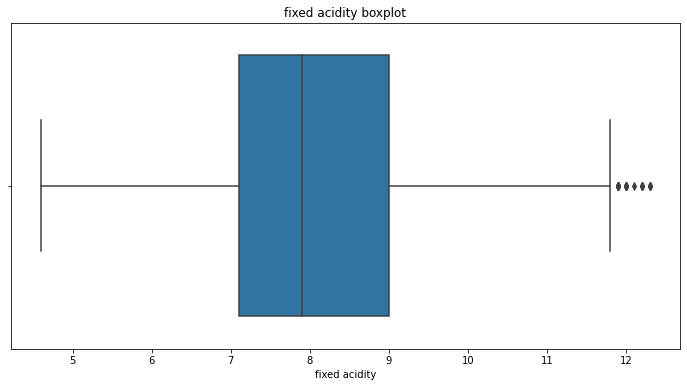

In [38]:
data['fixed acidity'] = data['fixed acidity'].mask(data['fixed acidity'] > upper_bound,data['fixed acidity'].mean())
data['fixed acidity'] = data['fixed acidity'].mask(data['fixed acidity'] < lower_bound,data['fixed acidity'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['fixed acidity']).set_title('fixed acidity boxplot')

### volatile acidity

In [39]:
v = data['volatile acidity']
iqr = (np.quantile(v, 0.75))-(np.quantile(v, 0.25))
upper_bound = np.quantile(v, 0.75)+(1.5*iqr)
lower_bound = np.quantile(v, 0.25)-(1.5*iqr)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


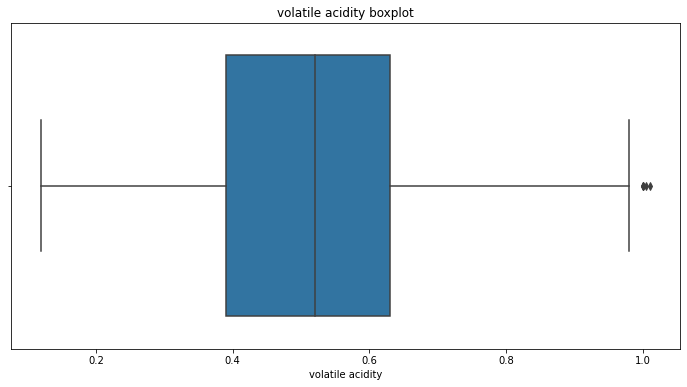

In [40]:
data['volatile acidity'] = data['volatile acidity'].mask(data['volatile acidity'] > upper_bound,data['volatile acidity'].mean())
data['volatile acidity'] = data['volatile acidity'].mask(data['volatile acidity'] < lower_bound,data['volatile acidity'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['volatile acidity']).set_title('volatile acidity boxplot')

### citric acid

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


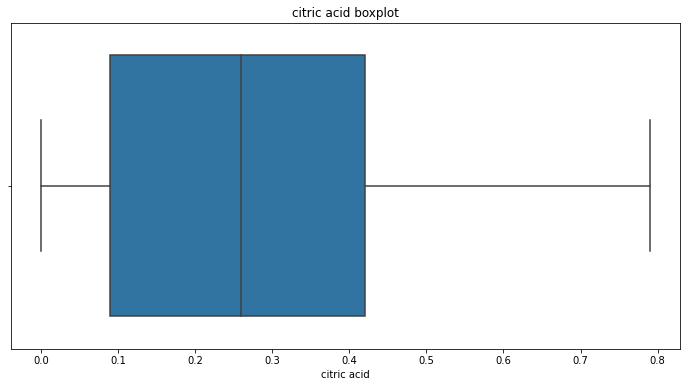

In [41]:
c = data['citric acid']
iqr = (np.quantile(c, 0.75))-(np.quantile(c, 0.25))
upper_bound = np.quantile(c, 0.75)+(1.5*iqr)
lower_bound = np.quantile(c, 0.25)-(1.5*iqr)

data['citric acid'] = data['citric acid'].mask(data['citric acid'] > upper_bound,data['citric acid'].mean())
data['citric acid'] = data['citric acid'].mask(data['citric acid'] < lower_bound,data['citric acid'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['citric acid']).set_title('citric acid boxplot')

### residual sugar

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


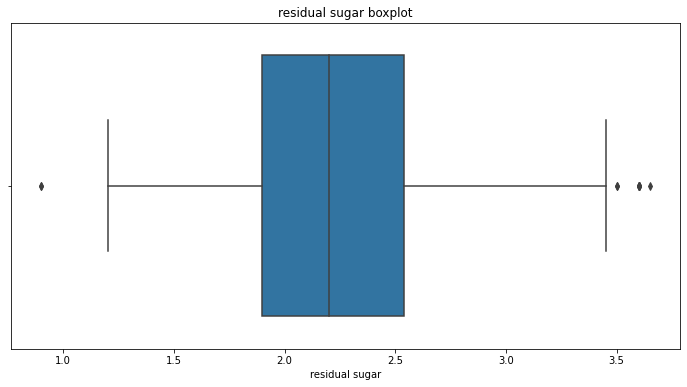

In [42]:
r = data['residual sugar']
iqr = (np.quantile(r, 0.75))-(np.quantile(r, 0.25))
upper_bound = np.quantile(r, 0.75)+(1.5*iqr)
lower_bound = np.quantile(r, 0.25)-(1.5*iqr)

data['residual sugar'] = data['residual sugar'].mask(data['residual sugar'] > upper_bound,data['residual sugar'].mean())
data['residual sugar'] = data['residual sugar'].mask(data['residual sugar'] < lower_bound,data['residual sugar'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['residual sugar']).set_title('residual sugar boxplot')

### chlorides

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


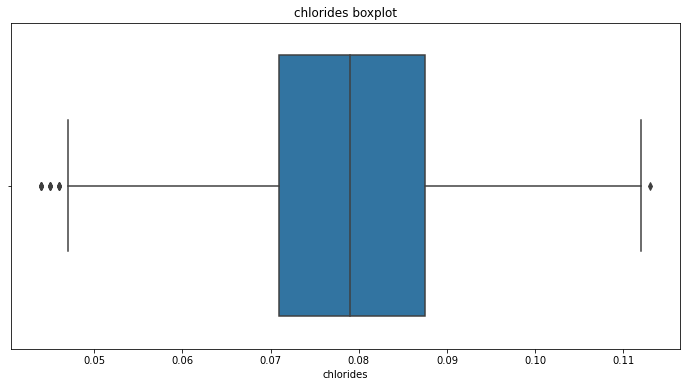

In [43]:
ch = data['chlorides']
iqr = (np.quantile(ch, 0.75))-(np.quantile(ch, 0.25))
upper_bound = np.quantile(ch, 0.75)+(1.5*iqr)
lower_bound = np.quantile(ch, 0.25)-(1.5*iqr)

data['chlorides'] = data['chlorides'].mask(data['chlorides'] > upper_bound,data['chlorides'].mean())
data['chlorides'] = data['chlorides'].mask(data['chlorides'] < lower_bound,data['chlorides'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['chlorides']).set_title('chlorides boxplot')

### free sulfur dioxide

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


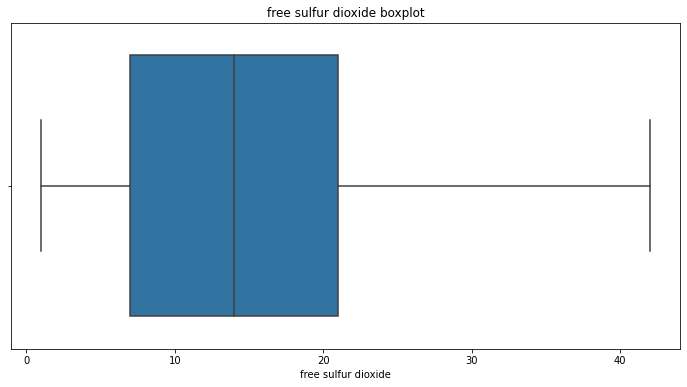

In [45]:
fs = data['free sulfur dioxide']
iqr = (np.quantile(fs, 0.75))-(np.quantile(fs, 0.25))
upper_bound = np.quantile(fs, 0.75)+(1.5*iqr)
lower_bound = np.quantile(fs, 0.25)-(1.5*iqr)

data['free sulfur dioxide'] = data['free sulfur dioxide'].mask(data['free sulfur dioxide'] > upper_bound,data['free sulfur dioxide'].mean())
data['free sulfur dioxide'] = data['free sulfur dioxide'].mask(data['free sulfur dioxide'] < lower_bound,data['free sulfur dioxide'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['free sulfur dioxide']).set_title('free sulfur dioxide boxplot')


### total sulfur dioxide

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


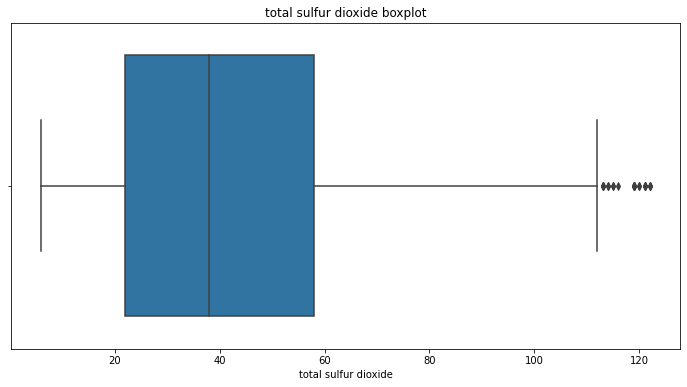

In [46]:
ts = data['total sulfur dioxide']
iqr = (np.quantile(ts, 0.75))-(np.quantile(ts, 0.25))
upper_bound = np.quantile(ts, 0.75)+(1.5*iqr)
lower_bound = np.quantile(ts, 0.25)-(1.5*iqr)

data['total sulfur dioxide'] = data['total sulfur dioxide'].mask(data['total sulfur dioxide'] > upper_bound,data['total sulfur dioxide'].mean())
data['total sulfur dioxide'] = data['total sulfur dioxide'].mask(data['total sulfur dioxide'] < lower_bound,data['total sulfur dioxide'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['total sulfur dioxide']).set_title('total sulfur dioxide boxplot')


### density

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


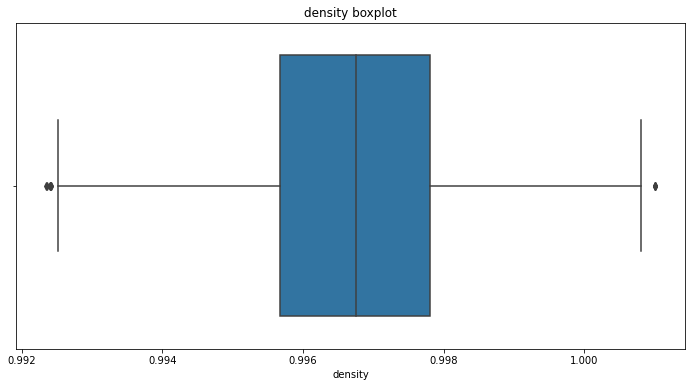

In [47]:
ds = data['density']
iqr = (np.quantile(ds, 0.75))-(np.quantile(ds, 0.25))
upper_bound = np.quantile(ds, 0.75)+(1.5*iqr)
lower_bound = np.quantile(ds, 0.25)-(1.5*iqr)

data['density'] = data['density'].mask(data['density'] > upper_bound,data['density'].mean())
data['density'] = data['density'].mask(data['density'] < lower_bound,data['density'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['density']).set_title('density boxplot')


###pH

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


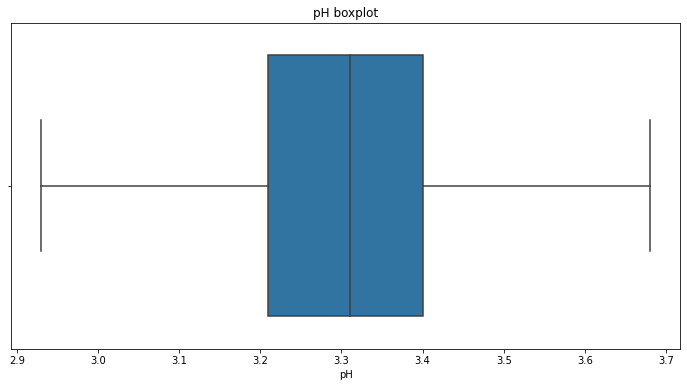

In [48]:
ph = data['pH']
iqr = (np.quantile(ph, 0.75))-(np.quantile(ph, 0.25))
upper_bound = np.quantile(ph, 0.75)+(1.5*iqr)
lower_bound = np.quantile(ph, 0.25)-(1.5*iqr)

data['pH'] = data['pH'].mask(data['pH'] > upper_bound,data['pH'].mean())
data['pH'] = data['pH'].mask(data['pH'] < lower_bound,data['pH'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['pH']).set_title('pH boxplot')


### sulphates

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


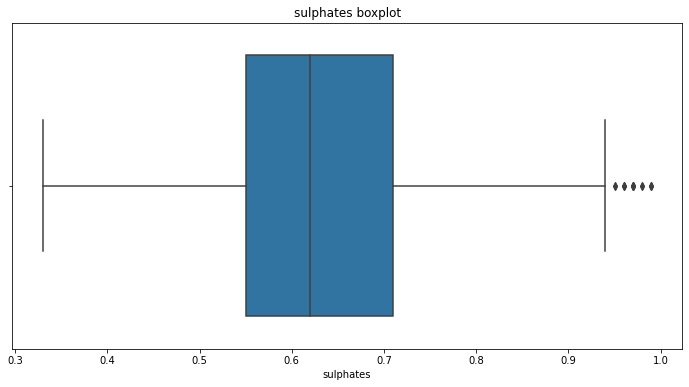

In [49]:
su = data['sulphates']
iqr = (np.quantile(su, 0.75))-(np.quantile(su, 0.25))
upper_bound = np.quantile(su, 0.75)+(1.5*iqr)
lower_bound = np.quantile(su, 0.25)-(1.5*iqr)

data['sulphates'] = data['sulphates'].mask(data['sulphates'] > upper_bound,data['sulphates'].mean())
data['sulphates'] = data['sulphates'].mask(data['sulphates'] < lower_bound,data['sulphates'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['sulphates']).set_title('sulphates boxplot')

### alcohol

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


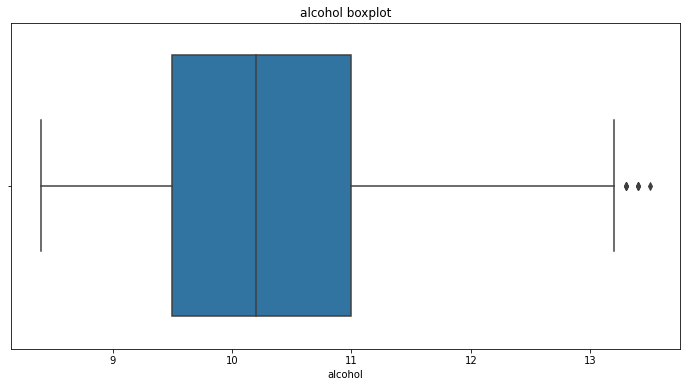

In [50]:
ac = data['alcohol']
iqr = (np.quantile(ac, 0.75))-(np.quantile(ac, 0.25))
upper_bound = np.quantile(ac, 0.75)+(1.5*iqr)
lower_bound = np.quantile(ac, 0.25)-(1.5*iqr)

data['alcohol'] = data['alcohol'].mask(data['alcohol'] > upper_bound,data['alcohol'].mean())
data['alcohol'] = data['alcohol'].mask(data['alcohol'] < lower_bound,data['alcohol'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['alcohol']).set_title('alcohol boxplot')

### quality

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


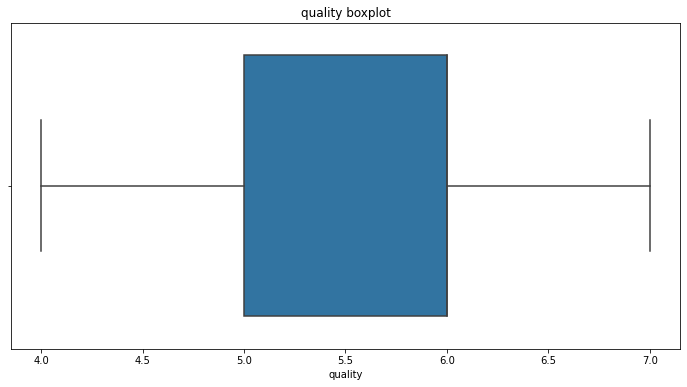

In [51]:
qt = data['quality']
iqr = (np.quantile(qt, 0.75))-(np.quantile(qt, 0.25))
upper_bound = np.quantile(qt, 0.75)+(1.5*iqr)
lower_bound = np.quantile(qt, 0.25)-(1.5*iqr)

data['quality'] = data['quality'].mask(data['quality'] > upper_bound,data['quality'].mean())
data['quality'] = data['quality'].mask(data['quality'] < lower_bound,data['quality'].mean())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(data['quality']).set_title('quality boxplot')

# Bivariate Analysis

Dilakukan dengan 2 variabel

## Korelasi Pearson

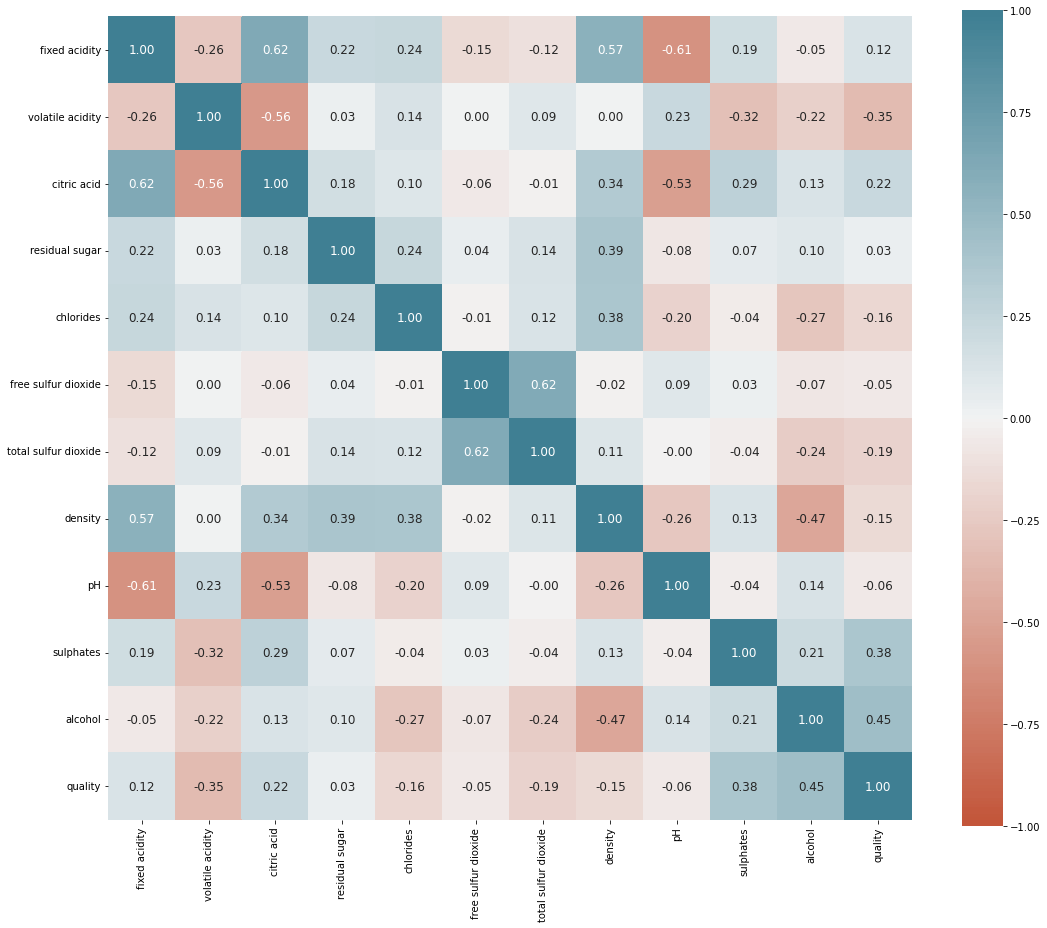

In [57]:
plt.subplots(figsize=(18,15))
sns.heatmap(data.corr(), annot=True, annot_kws={"size":12}, fmt='.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True);

Berdasar hasil heatmap di atas, korelasi 2 variabel terbesar yaitu citric acid dengan fixed acidity dan total sulfur dioxide dengan free sulfur dioxide yang sama-sama bernilai 0.62 . Ini berarti bahwa semakin tinggi kandungan citric acid, maka kandungan fixed acidity pun akan ikut bertambah. Begitu pun dengan free dan total sulfur dioxide. Dengan kata lain, hubungan nya berbanding lurus.

Sedangkan yang memiliki korelasi terendah yaitu pH dengan fixed acidity. Keduanya maupun variabel yang korelasinya bernilai negatif memiliki hubungan berbanding terbalik. Semakin rendah kandungan pH maka kandungan fixed acidity dalam wine tersebut semakin tinggi. 

## Scatterplot

<Figure size 1296x1296 with 0 Axes>

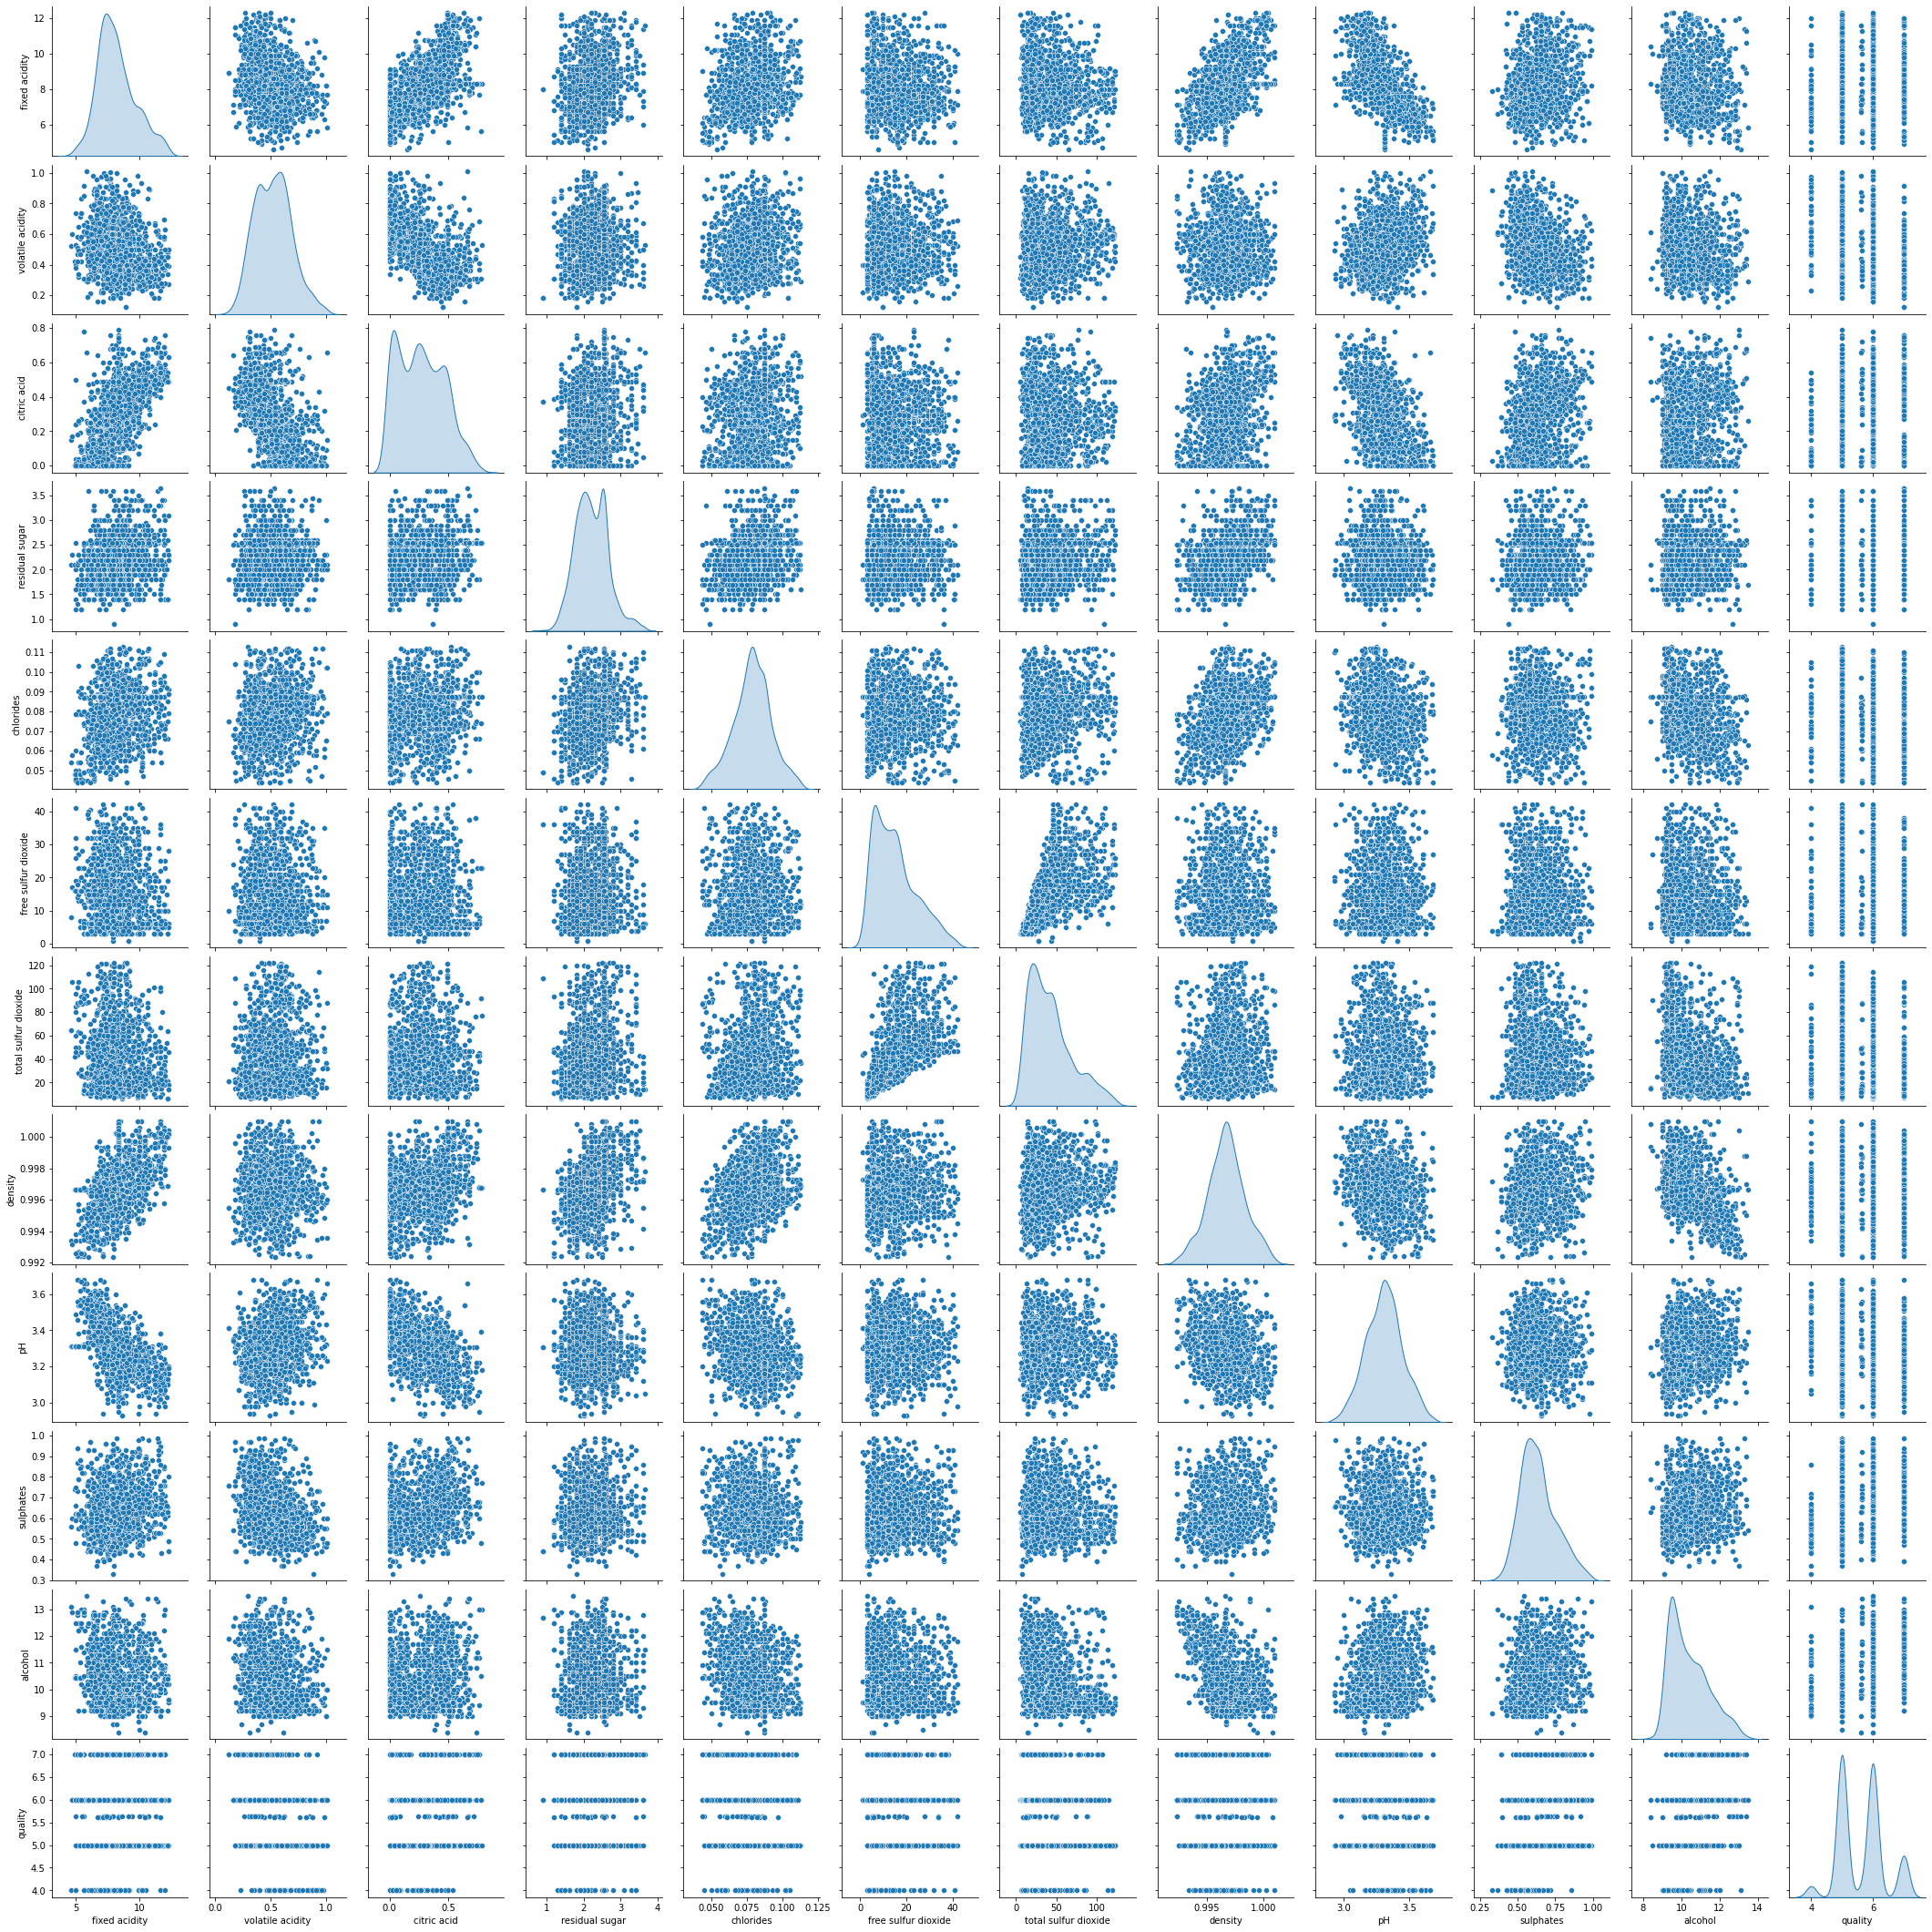

In [58]:
plt.figure(figsize=(18, 18))
sns.pairplot(data, diag_kind='kde')

Untuk mendukung hasil korelasi terbesar antara citric acid dengan fixed acidity dapat dilihat hubungannya pada scatterplot. Scatterplot kedua variabel tersebut berpola semakin naik ke sebelah kanan atas, dimana semakin tinggi kandungan citric acid maka kandungan fixed acidity secara otomatis pun akan semakin tinggi pula. 

Sedangkan scatterplot untuk pH dengan fixed acidity berpola semakin turun ke sebelah kanan atas. Semakin rendah kandungan pH maka kandungan fixed acidity dalam wine tersebut semakin tinggi. 